In [1]:
#logistic_regression
import tensorflow as tf
import math
import numpy
import pandas as pd
import matplotlib.pyplot as plt
import time
rng = numpy.random
start_time = time.time()

/home/lenovo/ML/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [2]:
#parameters
epochs = 1000
learning_rate = 0.1

df = pd.read_csv('logistic3.txt', names=['x','y'])
train_X = df['x']
train_Y = df['y']
n_samples = train_X.shape[0]

In [3]:
m = 3
b = 1



In [4]:


def calc_h(x,m,b):
    # 1/(1 + e^ -(mx+b))
    term = (m*x) + b
    term = term * -1.0
    exp1 = 1.0 + math.exp(term)
    exp2 = 1.0 / exp1
    #print("X = ",x," h[x] = ",exp2)
    return exp2

def calc_hx(h,x,y):
    a = (h-y)*x
    #print("h[x].x = ",sess.run(a))
    return a

def calc_cost(h,x,y):
    a = math.log(h)
    b1 = -1.0 * y
    b = b1* a
    
    c = 1.0 - h
    d = math.log(c)
    e = 1.0 - y
    g = d *e
    
    f = b-g
    return f

iteration no :  0   m =  3.0025589863369846   b =  0.9482118589324721   cost =  0.15308555917578712
iteration no :  1   m =  3.005027984105807   b =  0.8965389229099031   cost =  0.14732325809940858
iteration no :  2   m =  3.007412732334884   b =  0.8449773953248079   cost =  0.14195063635039834
iteration no :  3   m =  3.009718788349839   b =  0.7935237024401981   cost =  0.13695183061420957
iteration no :  4   m =  3.0119515370978838   b =  0.7421744886910899   cost =  0.1323120450107427
iteration no :  5   m =  3.014116200359675   b =  0.6909266119534367   cost =  0.12801749983929955
iteration no :  6   m =  3.016217845827971   b =  0.639777138813488   cost =  0.12405538303470393
iteration no :  7   m =  3.018261396034779   b =  0.588723339865573   cost =  0.12041380422612906
iteration no :  8   m =  3.0202516371108508   b =  0.5377626850616707   cost =  0.11708175128283123
iteration no :  9   m =  3.0221932273633016   b =  0.48689283913183895   cost =  0.11404904922539023
iteratio

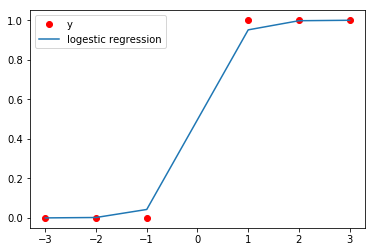

In [5]:
# Initializing the variables
c2 = 1000.0

    
for t in range(epochs):
        
    h = [] # h[x] = 1 / (1+(exp(b-mx))))
    hx = []
    cost = 0.0
    sum_hx = 0.0
    sum_h = 0.0
    for i in train_X:
        h.append(calc_h(i,m,b))

    for (i,j,k) in zip(h,train_X,train_Y):
        t1 = calc_hx(i,j,k)
        hx.append(t1)
        sum_hx = sum_hx + t1
        sum_h = sum_h + i
        cost = cost + calc_cost(i,j,k)
            
    if(cost > c2):
        break
    
    #if(cost < 0.01):
        #break


    m_new = m - ((learning_rate/n_samples) * sum_hx)
    #print(sess.run(m_new)) 

    b_new = b - ((learning_rate/n_samples) * sum_h)
    #print(sess.run(b_new))

    #print(sess.run(cost))
    m = m_new
    b = b_new
        
    print("iteration no : ",t,"  m = ",(m_new),"  b = ",(b_new),"  cost = ",(cost))
        
    c2 = (cost)
        
plt.plot(train_X,train_Y,'ro')
plt.plot(train_X,h,label='logestic regression')
plt.legend()
plt.show()
        
        